In [1]:
import random
import pyodbc
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR


In [45]:
cn = pyodbc.connect("DRIVER={SQL Server};SERVER=DESKTOP-BTN3TLD\TESQL;DATABASE=CoinData;Trusted_Connection=yes;")
# df = pd.read_sql("SELECT * FROM CoinData.dbo.SampleRegressionData", cn)
# index_keys = ["product_fk", "granularity_fk", "start_datetime", "timestamp"]

query = '''
select start_datetime
    , est_avg_price, comp_est_avg_price
    , interval_price_variance, comp_interval_price_variance
    , est_avg_trade_volume, comp_est_avg_trade_volume
--    , pct_change_interval_price_variance, comp_pct_change_interval_price_variance
--    , pct_change_est_avg_price, comp_pct_change_est_avg_price
--    , pct_change_est_avg_trade_volume, comp_pct_change_est_avg_trade_volume
FROM CoinData.dbo.SampleRegressionData
'''
df = pd.read_sql(query, cn)
df.set_index(keys="start_datetime",inplace=True)
print(df.shape)
df.tail()
df.diff().tail()

(50, 6)


,est_avg_price,comp_est_avg_price,interval_price_variance,comp_interval_price_variance,est_avg_trade_volume,comp_est_avg_trade_volume
start_datetime,,,,,,
2021-05-14 20:00:00.0000000,0.036200,1779.3725,-0.0076,-1825.70,1.352166e+06,-3.682749e+08
2021-05-13 20:00:00.0000000,0.022025,1516.9375,-0.0281,-1483.02,-1.128205e+06,3.586019e+07
2021-05-12 20:00:00.0000000,-0.017450,-587.8625,0.0381,3825.44,3.250582e+06,9.884817e+08
2021-05-11 20:00:00.0000000,0.058550,3776.0225,0.0570,3041.00,-1.252885e+06,-5.101884e+08
2021-05-10 20:00:00.0000000,0.018450,2825.0400,-0.0791,-7090.41,-2.988997e+06,-7.125334e+08


est_avg_price
comp_est_avg_price
interval_price_variance
comp_interval_price_variance
est_avg_trade_volume
comp_est_avg_trade_volume


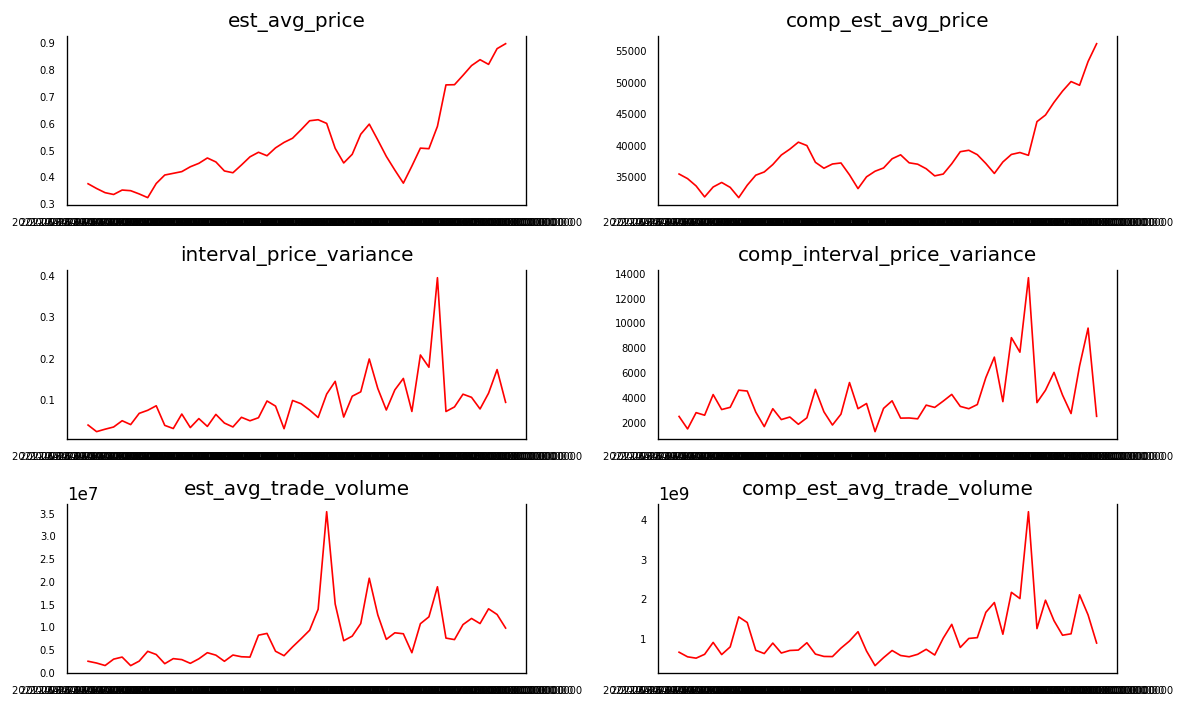

In [46]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    print(df.columns[i])
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [47]:
model = VAR(df)

C:\Users\thatc\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  warnings.warn('No frequency information was'
C:\Users\thatc\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
